In [77]:
import pandas as pd
from datetime import datetime
import numpy as np
from numba import njit
from tqdm import tqdm


import plotly.graph_objects as go
import plotly.express as px
import typing as tp
import vectorbt as vbt

In [78]:
df = pd.DataFrame(vbt.YFData.download('BTC-USD').get('Close'))
df = df[df.index>'2020-01-01']


In [93]:
# def get_tot_ret_TRAILINGADJUST(INIT_SL, TRAIL_SL, ACTIVATION):

#     # INIT_SL = 0.1
#     # TRAIL_SL = 0.03
#     # ACTIVATION = 0.2
    
#     @njit
#     def adjust_sl_func_nb(c, *args):
#         """Placeholder function that returns the initial stop-loss value and trailing flag."""
        
#         if c.curr_price > (1+ACTIVATION) * c.curr_stop:
#             STOP = TRAIL_SL
#             TRAIL = True
#         return STOP, TRAIL
    
#     portfolio = vbt.Portfolio.from_signals(
        
#         close = df.Close,  # Ceny zamknięcia
#         entries = df.entries,  # Sygnały wejścia
#         exits = df.exits,  # Sygnały wyjścia
#         sl_stop = INIT_SL,  # StopLoss w postaci procentowej
#         sl_trail=False,
#         adjust_sl_func_nb=adjust_sl_func_nb,
#         size = 100, 
#         init_cash = 100,
#         fees=0.002
             
#     )
#     tot_ret = np.round(portfolio.total_return(), 2)
#     return np.round(tot_ret*100, 2)
#     # Note that 0.01 = 1%.

In [108]:
def get_tot_portfolio(df, SL):

    # INIT_SL = 0.1
    # TRAIL_SL = 0.03

    
    portfolio = vbt.Portfolio.from_signals(
        
        close = df.Close,  # Ceny zamknięcia
        entries = df.entries,  # Sygnały wejścia
        exits = df.exits,  # Sygnały wyjścia
        sl_stop = SL,  # StopLoss w postaci procentowej
        sl_trail= True,
        
        size = 100, 
        init_cash = 100000,
        fees=0.002
             
    )
    tot_ret = np.round(portfolio.total_return(), 2)
    return portfolio, np.round(tot_ret*100, 2)
    # Note that 0.01 = 1%.

In [95]:
def get_tot_ret_SL(df, SL, should_trail):

    # INIT_SL = 0.1
    # TRAIL_SL = 0.03

    
    portfolio = vbt.Portfolio.from_signals(
        
        close = df.Close,  # Ceny zamknięcia
        entries = df.entries,  # Sygnały wejścia
        exits = df.exits,  # Sygnały wyjścia
        sl_stop = SL,  # StopLoss w postaci procentowej
        sl_trail=should_trail,
        
        size = 100, 
        init_cash = 100000,
        fees=0.002
             
    )
    tot_ret = np.round(portfolio.total_return(), 2)
    return np.round(tot_ret*100, 2)
    # Note that 0.01 = 1%.

In [96]:
# SL = 0.1
# should_trail = True
# tot_ret = get_tot_ret_SL(SL, should_trail)
# tot_ret

In [97]:
# print(pf.stats())
# pf.plot()
# np.arange(0.025, 0.3 + 0.001, 0.025) 
sl_table = np.round(np.arange(0.005, 0.8 + 0.001, 0.005), 3)
should_trail_table = [True, False]

In [98]:
df['entries'] = np.random.rand(length) < 0.2   # Randomly 15% of rows True
df['entries'] = [True if i % 10 == 0 else False for i in range(len(df))]
df['exits'] = False
df['entries'] = np.random.rand(length) < 0.20   # Randomly 15% of rows True
# df['entries'] = True
df['entries'].value_counts()

entries
False    1400
True      345
Name: count, dtype: int64

In [99]:
res = []
for epoch in range(1, 10):
    for should_trail in should_trail_table:
        for sl in tqdm(sl_table):
            df['entries'] = np.random.rand(length) < 0.2   # Randomly 15% of rows True
            tot_ret = get_tot_ret_SL(SL, should_trail)
            res.append([tot_ret, sl, should_trail, epoch])

  0%|                                                               | 0/160 [00:00<?, ?it/s]


TypeError: get_tot_ret_SL() missing 1 required positional argument: 'should_trail'

In [13]:
# res
rf = pd.DataFrame(res)

In [14]:
rf.columns = ['ret', 'sl', 't', 'ep']
rf.head(3)

,ret,sl,t,ep
0,455.0,0.005,True,1
1,546.0,0.010,True,1
2,269.0,0.015,True,1


In [15]:
rf.ep.max()

9

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

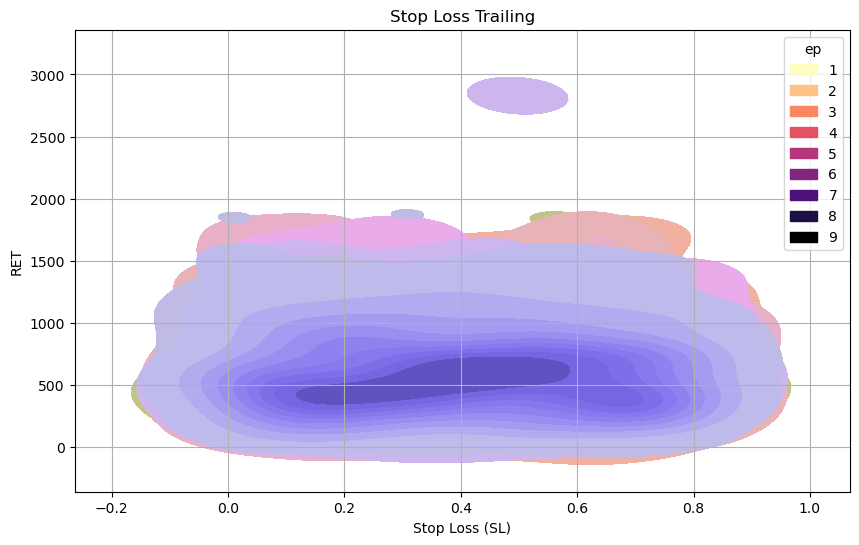

In [67]:
# Ustawienia wykresu
plt.figure(figsize=(10, 6))
eggT = rf[rf['t']==True]

# egg['ep'] = egg.ep * 10
# Stworzenie heatmapy
sns.kdeplot(
    data=eggT,
    x='sl', 
    y='ret',
    hue='ep',
    bw_adjust=0.9,
    palette='magma_r',
    fill=True,
    alpha=1.0,  # Przezroczystość
    thresh=0.03,   # Umożliwia rysowanie zera
)



# Ustawienia etykiet
plt.title('Stop Loss Trailing')
plt.xlabel('Stop Loss (SL)')
plt.ylabel('RET')
plt.grid()

# Pokazanie wykresu
plt.show()

In [43]:
egg.ret.max()

2884.0

# Testy portfolio

In [104]:
length = len(df)
df['entries'] = np.random.rand(length) < 0.55   # Randomly 15% of rows True\
df['entries'] = True
df['entries'].value_counts()

entries
True    1745
Name: count, dtype: int64

In [161]:
df.head(3)

,Close,entries,exits
Date,,,
2020-01-02 00:00:00+00:00,6985.470215,True,False
2020-01-03 00:00:00+00:00,7344.884277,True,False
2020-01-04 00:00:00+00:00,7410.656738,True,False


In [156]:
pf = vbt.Portfolio.from_signals(
        
        close = df.Close,  # Ceny zamknięcia
        entries = True,  # Sygnały wejścia
        # exits = False,  # Sygnały wyjścia
        # sl_stop = SL,  # StopLoss w postaci procentowej
        # sl_trail= True,
        
        size = 1, 
        init_cash = 1000000,
        fees=0.002, 
        accumulate=False
             
    )
tot_ret = np.round(portfolio.total_return(), 2)
print(f"RET:{tot_ret}, Trades:{ pf.stats()[11:12].values[0]}")

RET:3.11, Trades:1


In [149]:
len(df)

1745

In [160]:
pf.log_records

array([],
      dtype={'names': ['id', 'group', 'col', 'idx', 'cash', 'position', 'debt', 'free_cash', 'val_price', 'value', 'req_size', 'req_price', 'req_size_type', 'req_direction', 'req_fees', 'req_fixed_fees', 'req_slippage', 'req_min_size', 'req_max_size', 'req_size_granularity', 'req_reject_prob', 'req_lock_cash', 'req_allow_partial', 'req_raise_reject', 'req_log', 'new_cash', 'new_position', 'new_debt', 'new_free_cash', 'new_val_price', 'new_value', 'res_size', 'res_price', 'res_fees', 'res_side', 'res_status', 'res_status_info', 'order_id'], 'formats': ['<i8', '<i8', '<i8', '<i8', '<f8', '<f8', '<f8', '<f8', '<f8', '<f8', '<f8', '<f8', '<i8', '<i8', '<f8', '<f8', '<f8', '<f8', '<f8', '<f8', '<f8', '?', '?', '?', '?', '<f8', '<f8', '<f8', '<f8', '<f8', '<f8', '<f8', '<f8', '<f8', '<i8', '<i8', '<i8', '<i8'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 152, 160, 168, 169, 170, 171, 176, 184, 192, 200, 208, 216, 224, 232, 240, 248, 2

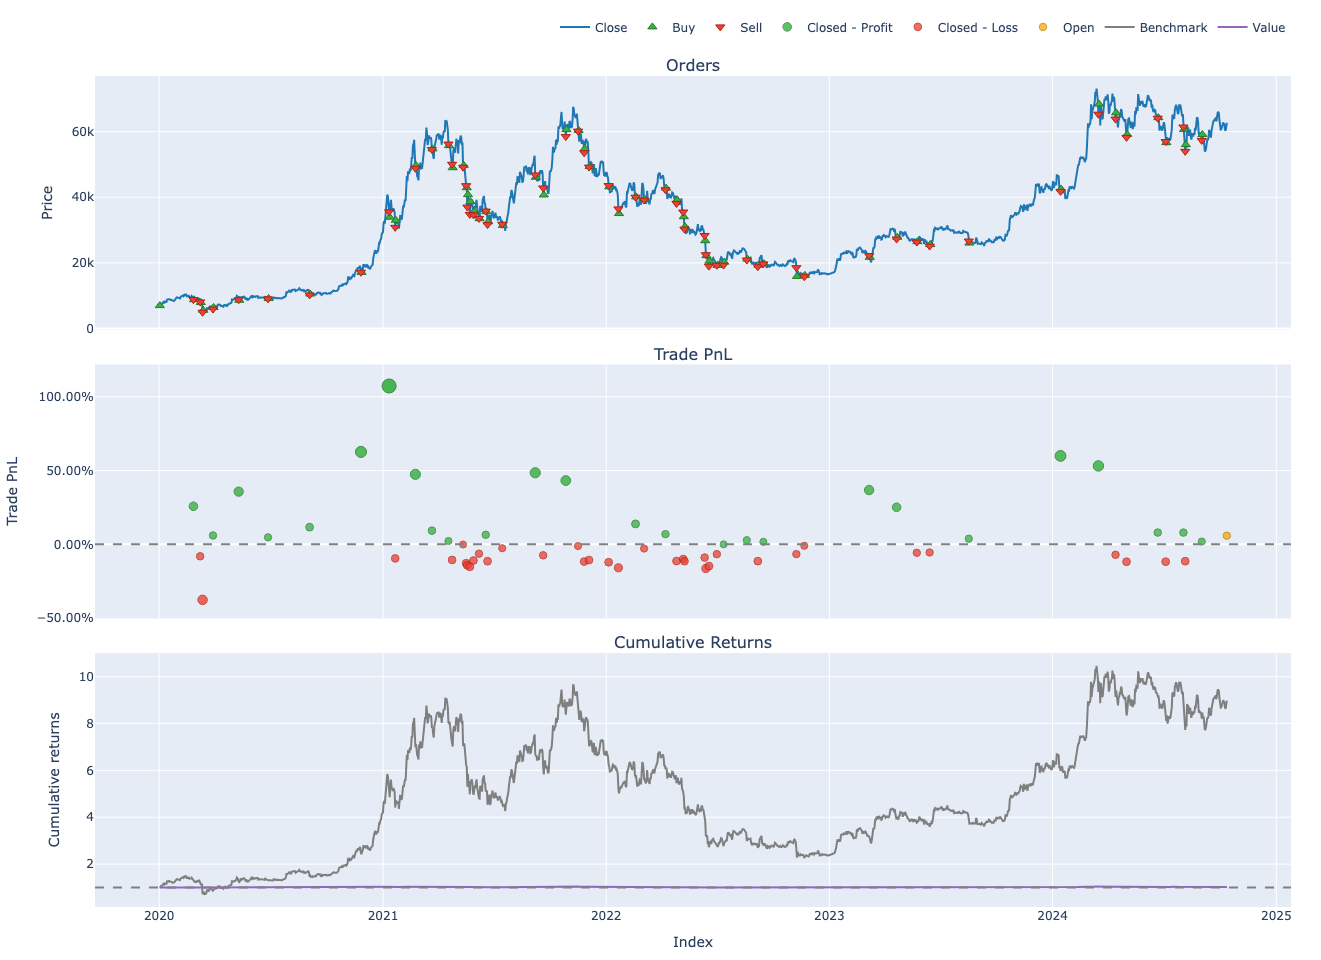

Start                         2020-01-02 00:00:00+00:00
End                           2024-10-12 00:00:00+00:00
Period                                             1745
Start Value                                   1000000.0
End Value                                1028099.444274
Total Return [%]                               2.809944
Benchmark Return [%]                         797.773315
Max Gross Exposure [%]                         6.965576
Total Fees Paid                             8652.724183
Max Drawdown [%]                               5.615658
Max Drawdown Duration                            1277.0
Total Trades                                         62
Total Closed Trades                                  61
Total Open Trades                                     1
Open Trade PnL                               3482.98207
Win Rate [%]                                  42.622951
Best Trade [%]                               107.274212
Worst Trade [%]                              -37

/opt/miniconda3/envs/RAJ/lib/python3.12/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/opt/miniconda3/envs/RAJ/lib/python3.12/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/opt/miniconda3/envs/RAJ/lib/python3.12/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/opt/miniconda3/envs/RAJ/lib/python3.12/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



In [118]:
# Wizualizacja wyników
pf.plot().show()

# Wyświetlenie podsumowania wyników
print(pf.stats())

print(pf.stats())
print(pf.orders.records_readable)